In [ ]:
# 1. tensorflow.keras의 dataset에서 fashion_mnist 데이터 준비
# 2. 데이터 확인 ( 이미지 화면에 표시, 데이터 구조 확인 )
# 3. 모델 구조 설계
# 4. 모델 학습 설계
# 5. 학습 실행
# 6. 평가
# 7. 기타 (예측, ...)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as tf_keras

In [2]:
# 데이터 준비
(X_train, y_train), (X_test, y_test) = tf_keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 28, 28) (60000,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


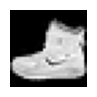

In [8]:
# 데이터 확인

# label_name
# 0 T-shirt/top, 1 Trouser, 2 Pullover, 3 Dress, 4 Coat, 5 Sandal, 6 Shirt, 7 Sneaker, 8 Bag, 9 Ankle boot

print(X_train.shape, y_train.shape)
print(np.unique(y_train, return_counts=True))

plt.figure(figsize=(1, 1))
plt.imshow(X_train[0], cmap='gray')
plt.axis('off')
plt.show()

In [13]:
# 데이터 전처리
flattened_X_train = X_train.reshape(-1, 784) # 2차원 입력을 1차원 입력으로 변경
flattened_X_test = X_test.reshape(-1, 784)

print(flattened_X_train.shape)

(60000, 784)


In [9]:
# 모델 구조 설계

model = tf_keras.models.Sequential()
model.add(tf_keras.layers.Input(shape=(784, )))
model.add(tf_keras.layers.Dense(512, activation='relu'))
model.add(tf_keras.layers.Dense(256, activation='relu'))
model.add(tf_keras.layers.Dense(128, activation='relu'))
model.add(tf_keras.layers.Dense(10, activation='softmax')) # 출력층

In [14]:
# 모델 학습 설계

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
model.fit(flattened_X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7009 - loss: 11.1362 - val_accuracy: 0.7842 - val_loss: 0.8587
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.8221 - loss: 0.6306 - val_accuracy: 0.8357 - val_loss: 0.5710
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8488 - loss: 0.4537 - val_accuracy: 0.8356 - val_loss: 0.4978
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8621 - loss: 0.3926 - val_accuracy: 0.8402 - val_loss: 0.4716
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8718 - loss: 0.3562 - val_accuracy: 0.8552 - val_loss: 0.4402
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.8772 - loss: 0.3462 - val_accuracy: 0.8615 - val_loss: 0.4429
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8792 - loss: 0.3283 - val_accuracy: 0.8643 - val_loss: 0.4054
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8835 - loss: 0.3243 - val_